# Problem Statement

1.	A psychological study has been conducted by a team of students at a university on married couples to determine the cause of having an extra marital affair. They have surveyed and collected a sample of data on which they would like to do further analysis. Apply Logistic Regression on the data to correctly classify whether a given person will have an affair or not given the set of attributes. Convert the naffairs column to discrete binary type before proceeding with the algorithm.

---- ### ----

We will import our libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,15)

In [2]:
data = pd.read_csv('Affairs.csv')
data.shape

(601, 18)

We have 601 rows and 18 columns in our dataset, lets explore our dataset

In [3]:
data.head()

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,3,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [4]:
data.describe()

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,1.455907,0.715474,0.026622,0.109817,0.154742,0.322795,0.386023,0.079867,0.272879,0.214642,0.316140,0.116473,0.086522,0.146423,0.174709,0.136439,0.116473,0.339434
std,3.298758,0.451564,0.161111,0.312922,0.361960,0.467935,0.487242,0.271313,0.445810,0.410916,0.465355,0.321058,0.281368,0.353824,0.380034,0.343540,0.321058,0.473912
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


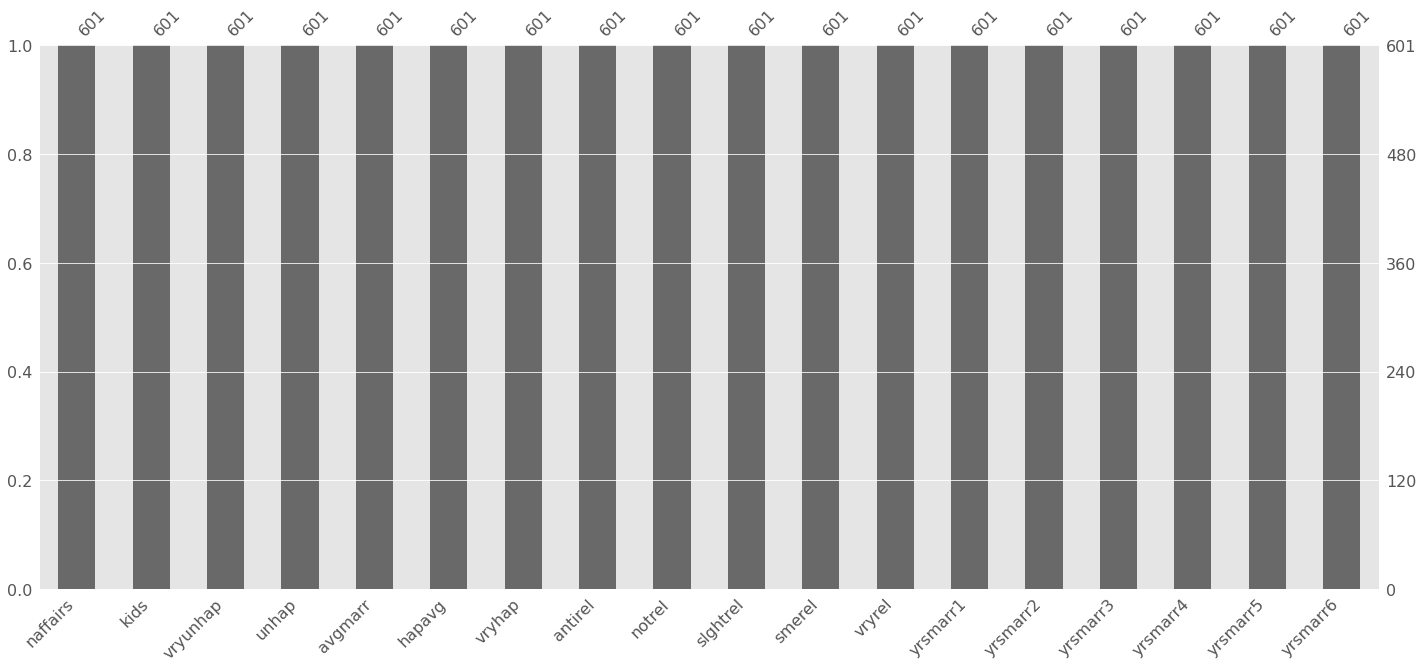

In [5]:
msno.bar(data)

There are no missing values in our dataset

In [6]:
data.dtypes

naffairs    int64
kids        int64
vryunhap    int64
unhap       int64
avgmarr     int64
hapavg      int64
vryhap      int64
antirel     int64
notrel      int64
slghtrel    int64
smerel      int64
vryrel      int64
yrsmarr1    int64
yrsmarr2    int64
yrsmarr3    int64
yrsmarr4    int64
yrsmarr5    int64
yrsmarr6    int64
dtype: object

In [7]:
data.columns

Index(['naffairs', 'kids', 'vryunhap', 'unhap', 'avgmarr', 'hapavg', 'vryhap',
       'antirel', 'notrel', 'slghtrel', 'smerel', 'vryrel', 'yrsmarr1',
       'yrsmarr2', 'yrsmarr3', 'yrsmarr4', 'yrsmarr5', 'yrsmarr6'],
      dtype='object')

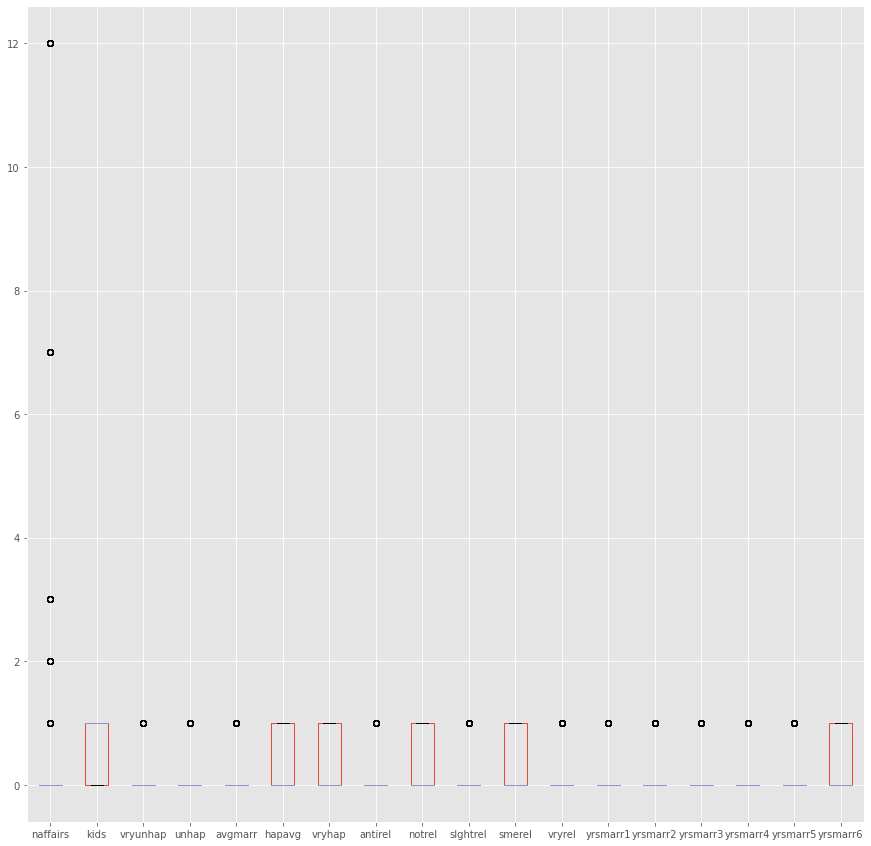

In [8]:
data[['naffairs', 'kids', 'vryunhap', 'unhap', 'avgmarr', 'hapavg', 'vryhap',
       'antirel', 'notrel', 'slghtrel', 'smerel', 'vryrel', 'yrsmarr1',
       'yrsmarr2', 'yrsmarr3', 'yrsmarr4', 'yrsmarr5', 'yrsmarr6']].plot(kind='box')

Seems like only naffairs may have some outliers

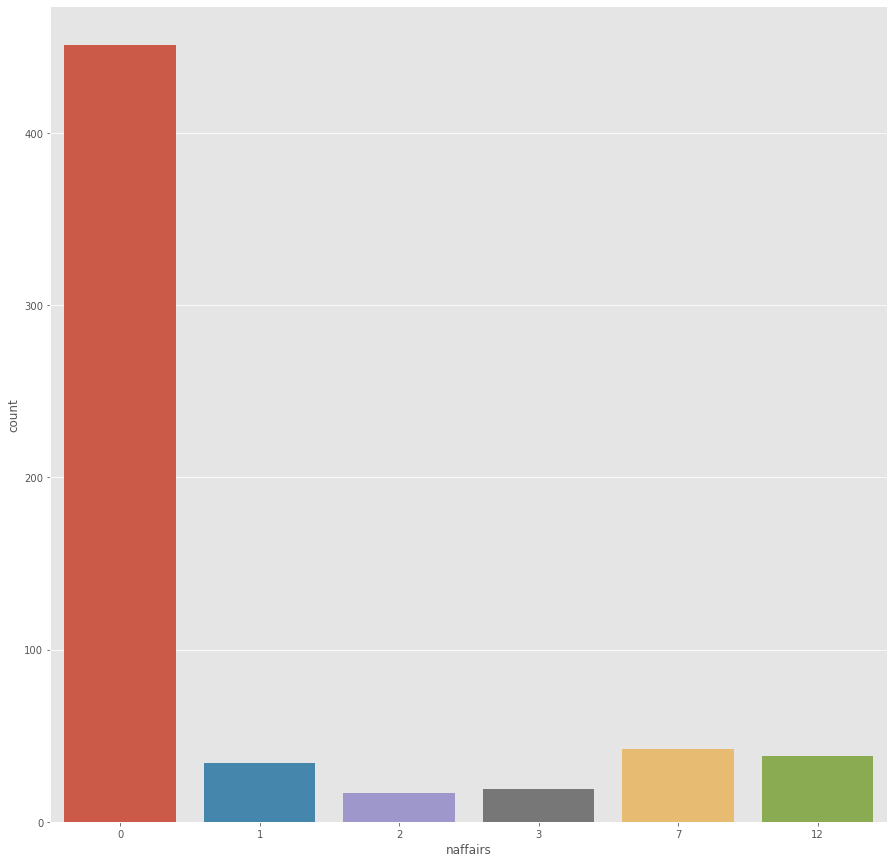

In [9]:
sns.countplot(data['naffairs'])

In [10]:
data['naffairs'].value_counts()/data.shape[0]

0     0.750416
7     0.069884
12    0.063228
1     0.056572
3     0.031614
2     0.028286
Name: naffairs, dtype: float64

75% of the data shows number of affairs to be 0. 

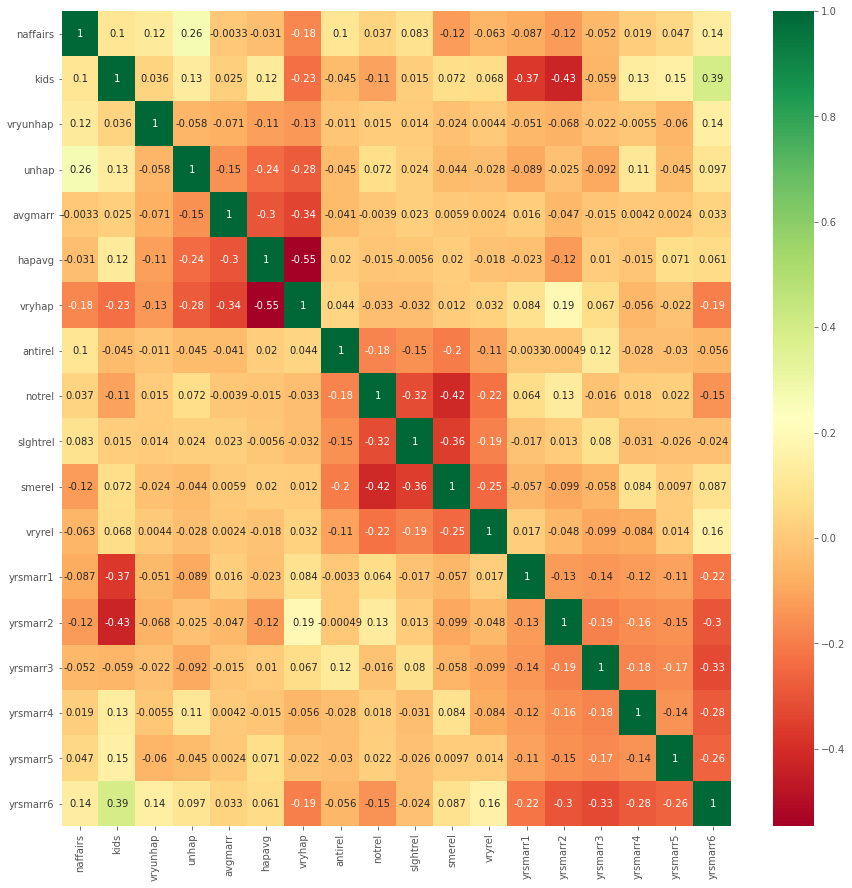

In [11]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

In [12]:
data.kids.value_counts()/data.shape[0]

1    0.715474
0    0.284526
Name: kids, dtype: float64

As per requirement, they want us to discrete our naffairs column

In [13]:
data['affairs'] = data['naffairs'].apply(lambda x:0 if x==0 else 1)

In [14]:
data.head()

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6,affairs
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
2,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
4,3,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1


We can now drop our naffairs column from our dataset

In [15]:
backup = data

In [16]:
new_data = data.drop(columns='naffairs')
new_data.head()

,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6,affairs
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1


Since we transformed our naffairs column to a discrete column, we will now check for data break up

In [17]:
new_data['affairs'].value_counts()/data.shape[0]

0    0.750416
1    0.249584
Name: affairs, dtype: float64

Lets Build our Model

In [18]:
import statsmodels.formula.api as sm

In [19]:
new_data.columns

Index(['kids', 'vryunhap', 'unhap', 'avgmarr', 'hapavg', 'vryhap', 'antirel',
       'notrel', 'slghtrel', 'smerel', 'vryrel', 'yrsmarr1', 'yrsmarr2',
       'yrsmarr3', 'yrsmarr4', 'yrsmarr5', 'yrsmarr6', 'affairs'],
      dtype='object')

In [20]:
logit_model = sm.logit('affairs ~ kids + vryunhap + unhap + avgmarr + hapavg + vryhap + antirel + notrel + slghtrel + smerel + vryrel + yrsmarr1 + yrsmarr2 + yrsmarr3 + yrsmarr4 + yrsmarr5 + yrsmarr6',data=new_data).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.501009
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                affairs   No. Observations:                  601
Model:                          Logit   Df Residuals:                      586
Method:                           MLE   Df Model:                           14
Date:                Mon, 20 Dec 2021   Pseudo R-squ.:                  0.1083
Time:                        09:00:39   Log-Likelihood:                -301.11
converged:                       True   LL-Null:                       -337.69
Covariance Type:            nonrobust   LLR p-value:                 5.129e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6174   4.04e+06  -1.53e-07      1.000   -7.91e+06    7.91e+06
kids           0.1727      0.311      0.556      0.579      -0.437       0.782
vryunhap       0.5130   6.46e+07   7.94e-09      1.000   -1.27e+08    1.27e+08
unhap          0.6187   6.51e+07   9.51e-09      1.000   -1.28e+08    1.28e+08
avgmarr       -0.2178   6.51e+07  -3.34e-09      1.000   -1.28e+08    1.28e+08
hapavg        -0.5264   6.51e+07  -8.08e-09      1.000   -1.28e+08    1.28e+08
vryhap        -1.0049   5.92e+07   -1.7e-08      1.000   -1.16e+08    1.16e+08
antirel        0.7815   1.01e+08   7.73e-09      1.000   -1.98e+08    1.98e+08
notrel        -0.2052   1.01e+08  -2.03e-09      1.000   -1.98e+08    1.98e+08
slghtrel       0.1848   9.44e+07   1.96e-09      1.000   -1.85e+08    1.85e+08
smerel        -0.7377   9.45e+07  -7.81e-09      1.000   -1.85e+08    1.85e+08
vryrel        -0.6408   9.46e+07  -6.77e-09      1.000   -1.85e+08    1.85e+08
yrsmarr1      -0.8579    2.6e+07   -3.3e-08      1.000   -5.09e+07    5.09e+07
yrsmarr2      -0.5608    2.6e+07  -2.16e-08      1.000   -5.09e+07    5.09e+07
yrsmarr3       0.0635    2.6e+07   2.45e-09      1.000   -5.09e+07    5.09e+07
yrsmarr4       0.0891    2.6e+07   3.43e-09      1.000   -5.09e+07    5.09e+07
yrsmarr5       0.4088    2.6e+07   1.57e-08      1.000   -5.09e+07    5.09e+07
yrsmarr6       0.2399    2.6e+07   9.24e-09      1.000   -5.09e+07    5.09e+07
==============================================================================
"""

In [24]:
pred = logit_model.predict(new_data.iloc[:,:-1])

In [25]:
pred

0      0.365805
1      0.139673
2      0.179485
3      0.512577
4      0.231248
         ...   
596    0.162239
597    0.264067
598    0.593288
599    0.366694
600    0.247362
Length: 601, dtype: float64

In [26]:
from sklearn import metrics

In [29]:
fpr, tpr, thresholds = metrics.roc_curve(new_data.affairs, pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.2521571570135329

In [30]:
import pylab as pl

In [31]:
i = np.arange(len(tpr))
roc = pd.DataFrame({'fpr': pd.Series(fpr, index=i), 'tpr': pd.Series(tpr, index=i),'1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
61,0.312639,0.673333,0.687361,-0.014028,0.24517


Area under the ROC curve : 0.720880


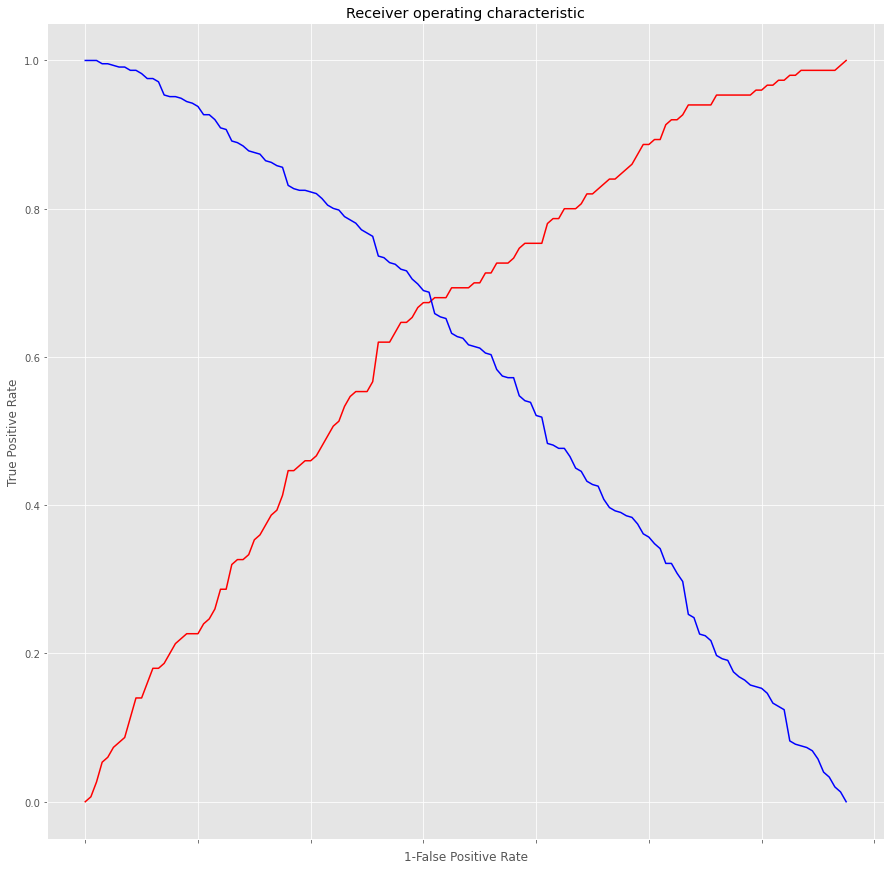

In [34]:
# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'], color = 'red')
pl.plot(roc['1-fpr'], color = 'blue')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

In [35]:
new_data['pred'] = np.zeros(len(new_data['affairs']))
new_data

,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6,affairs,pred
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0.0
1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0.0
2,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0.0
3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0.0
4,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0
597,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0.0
598,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.0
599,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0.0


In [37]:
new_data.loc[pred > optimal_threshold, "pred"] = 1
new_data

,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6,affairs,pred
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1.0
1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0.0
2,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0.0
3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1.0
4,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0
597,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1.0
598,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1.0
599,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1.0


In [42]:
# Classification Report

classification = metrics.classification_report(new_data['pred'], new_data['affairs'])
print(classification)

              precision    recall  f1-score   support

         0.0       0.71      0.86      0.77       370
         1.0       0.65      0.42      0.51       231

    accuracy                           0.69       601
   macro avg       0.68      0.64      0.64       601
weighted avg       0.69      0.69      0.67       601



In [45]:
confusion_matrix = pd.crosstab(new_data.pred, new_data['affairs'])
confusion_matrix

affairs,0,1
pred,,
0.0,318,52
1.0,133,98


In [47]:
accuracy_score = (318+98)/601
accuracy_score

0.6921797004991681

In [50]:
from sklearn import preprocessing

In [65]:
norm_data = new_data

In [69]:
norm_data.drop(columns='pred',inplace=True)

In [70]:
norm_data

,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6,affairs
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
597,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
598,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
599,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [73]:
names = norm_data.columns
d = preprocessing.normalize(norm_data[['kids', 'vryunhap', 'unhap', 'avgmarr', 'hapavg', 'vryhap', 'antirel',
       'notrel', 'slghtrel', 'smerel', 'vryrel', 'yrsmarr1', 'yrsmarr2',
       'yrsmarr3', 'yrsmarr4', 'yrsmarr5', 'yrsmarr6','affairs']])
norm_data = pd.DataFrame(d,columns=names)
norm_data.drop(columns='affairs')
norm_data['affairs'] = new_data['affairs']
norm_data

,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6,affairs
0,0.000000,0.0,0.0,0.0,0.57735,0.000000,0.0,0.0,0.577350,0.00000,0.0,0.0,0.0,0.000000,0.0,0.57735,0.000000,0
1,0.000000,0.0,0.0,0.0,0.57735,0.000000,0.0,0.0,0.000000,0.57735,0.0,0.0,0.0,0.577350,0.0,0.00000,0.000000,0
2,0.000000,0.0,0.0,0.0,0.50000,0.000000,0.0,0.0,0.500000,0.00000,0.0,0.0,0.5,0.000000,0.0,0.00000,0.000000,1
3,0.500000,0.0,0.0,0.0,0.50000,0.000000,0.5,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.500000,0
4,0.447214,0.0,0.0,0.0,0.00000,0.447214,0.0,0.0,0.447214,0.00000,0.0,0.0,0.0,0.447214,0.0,0.00000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0.000000,0.0,0.0,0.0,0.57735,0.000000,0.0,0.0,0.000000,0.57735,0.0,0.0,0.0,0.000000,0.0,0.00000,0.577350,0
597,0.447214,0.0,0.0,0.0,0.00000,0.447214,0.0,0.0,0.447214,0.00000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.447214,1
598,0.500000,0.0,0.5,0.0,0.00000,0.000000,0.0,0.5,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.50000,0.000000,0
599,0.500000,0.0,0.0,0.0,0.50000,0.000000,0.0,0.0,0.500000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.500000,0


We have normalized our data to see if it improves the accuracy

In [75]:
import statsmodels.formula.api as sm
logit_model2 = sm.logit('affairs ~ kids + vryunhap + unhap + avgmarr + hapavg + vryhap + antirel + notrel + slghtrel + smerel + vryrel + yrsmarr1 + yrsmarr2 + yrsmarr3 + yrsmarr4 + yrsmarr5 + yrsmarr6',data=norm_data).fit()
logit_model2.summary()

         Current function value: 0.000000
         Iterations: 35


C:\Users\jaic208\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\jaic208\Anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                affairs   No. Observations:                  601
Model:                          Logit   Df Residuals:                      585
Method:                           MLE   Df Model:                           15
Date:                Mon, 20 Dec 2021   Pseudo R-squ.:                   1.000
Time:                        09:46:00   Log-Likelihood:            -1.5829e-05
converged:                      False   LL-Null:                       -337.69
Covariance Type:            nonrobust   LLR p-value:                3.276e-134
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    304.2002   4604.715      0.066      0.947   -8720.876    9329.276
kids         -76.4558   8321.418     -0.009      0.993   -1.64e+04    1.62e+04
vryunhap    -198.9063   1.55e+10  -1.28e-08      1.000   -3.04e+10    3.04e+10
unhap       -198.8609   5.23e+10   -3.8e-09      1.000   -1.02e+11    1.02e+11
avgmarr     -199.8977        nan        nan        nan         nan         nan
hapavg      -200.1240   4.15e+10  -4.82e-09      1.000   -8.14e+10    8.14e+10
vryhap      -200.8224        nan        nan        nan         nan         nan
antirel     -198.6062        nan        nan        nan         nan         nan
notrel      -200.1253        nan        nan        nan         nan         nan
slghtrel    -199.4782        nan        nan        nan         nan         nan
smerel      -200.3340        nan        nan        nan         nan         nan
vryrel      -200.0676        nan        nan        nan         nan         nan
yrsmarr1    -164.0538        nan        nan        nan         nan         nan
yrsmarr2    -166.6483        nan        nan        nan         nan         nan
yrsmarr3    -167.1272        nan        nan        nan         nan         nan
yrsmarr4    -167.0963        nan        nan        nan         nan         nan
yrsmarr5    -166.7054        nan        nan        nan         nan         nan
yrsmarr6    -166.9802        nan        nan        nan         nan         nan
==============================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

In [77]:
pred2 = logit_model2.predict(norm_data.iloc[:,:-1])

In [78]:
fpr, tpr, thresholds = metrics.roc_curve(norm_data.affairs, pred2)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.9999998728348569

In [79]:
i = np.arange(len(tpr))
roc = pd.DataFrame({'fpr': pd.Series(fpr, index=i), 'tpr': pd.Series(tpr, index=i),'1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
53,0.0,1.0,1.0,0.0,1.0


Area under the ROC curve : 1.000000


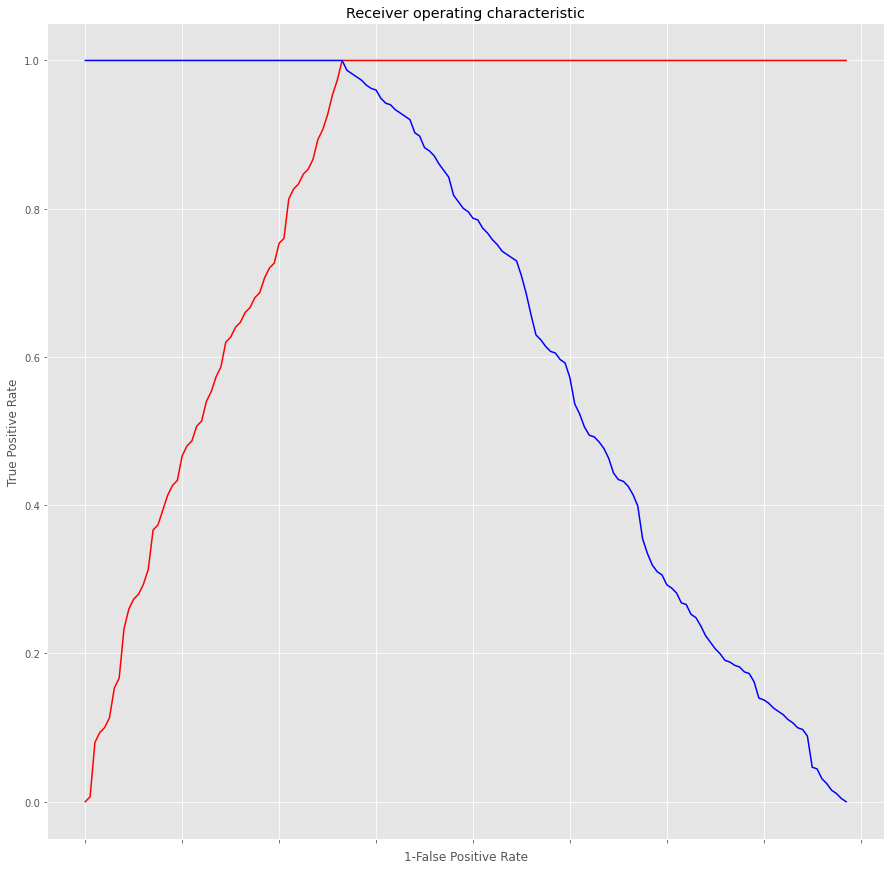

In [80]:
# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'], color = 'red')
pl.plot(roc['1-fpr'], color = 'blue')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

In [81]:
norm_data['pred'] = np.zeros(len(norm_data['affairs']))
norm_data

,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6,affairs,pred
0,0.000000,0.0,0.0,0.0,0.57735,0.000000,0.0,0.0,0.577350,0.00000,0.0,0.0,0.0,0.000000,0.0,0.57735,0.000000,0,0.0
1,0.000000,0.0,0.0,0.0,0.57735,0.000000,0.0,0.0,0.000000,0.57735,0.0,0.0,0.0,0.577350,0.0,0.00000,0.000000,0,0.0
2,0.000000,0.0,0.0,0.0,0.50000,0.000000,0.0,0.0,0.500000,0.00000,0.0,0.0,0.5,0.000000,0.0,0.00000,0.000000,1,0.0
3,0.500000,0.0,0.0,0.0,0.50000,0.000000,0.5,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.500000,0,0.0
4,0.447214,0.0,0.0,0.0,0.00000,0.447214,0.0,0.0,0.447214,0.00000,0.0,0.0,0.0,0.447214,0.0,0.00000,0.000000,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0.000000,0.0,0.0,0.0,0.57735,0.000000,0.0,0.0,0.000000,0.57735,0.0,0.0,0.0,0.000000,0.0,0.00000,0.577350,0,0.0
597,0.447214,0.0,0.0,0.0,0.00000,0.447214,0.0,0.0,0.447214,0.00000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.447214,1,0.0
598,0.500000,0.0,0.5,0.0,0.00000,0.000000,0.0,0.5,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.50000,0.000000,0,0.0
599,0.500000,0.0,0.0,0.0,0.50000,0.000000,0.0,0.0,0.500000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.500000,0,0.0


In [82]:
norm_data.loc[pred2 > optimal_threshold, "pred"] = 1
norm_data

,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6,affairs,pred
0,0.000000,0.0,0.0,0.0,0.57735,0.000000,0.0,0.0,0.577350,0.00000,0.0,0.0,0.0,0.000000,0.0,0.57735,0.000000,0,0.0
1,0.000000,0.0,0.0,0.0,0.57735,0.000000,0.0,0.0,0.000000,0.57735,0.0,0.0,0.0,0.577350,0.0,0.00000,0.000000,0,0.0
2,0.000000,0.0,0.0,0.0,0.50000,0.000000,0.0,0.0,0.500000,0.00000,0.0,0.0,0.5,0.000000,0.0,0.00000,0.000000,1,1.0
3,0.500000,0.0,0.0,0.0,0.50000,0.000000,0.5,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.500000,0,0.0
4,0.447214,0.0,0.0,0.0,0.00000,0.447214,0.0,0.0,0.447214,0.00000,0.0,0.0,0.0,0.447214,0.0,0.00000,0.000000,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0.000000,0.0,0.0,0.0,0.57735,0.000000,0.0,0.0,0.000000,0.57735,0.0,0.0,0.0,0.000000,0.0,0.00000,0.577350,0,0.0
597,0.447214,0.0,0.0,0.0,0.00000,0.447214,0.0,0.0,0.447214,0.00000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.447214,1,1.0
598,0.500000,0.0,0.5,0.0,0.00000,0.000000,0.0,0.5,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.50000,0.000000,0,0.0
599,0.500000,0.0,0.0,0.0,0.50000,0.000000,0.0,0.0,0.500000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.500000,0,0.0


In [84]:
# Classification Report

classification = metrics.classification_report(norm_data['pred'], norm_data['affairs'])
print(classification)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       453
         1.0       0.99      1.00      0.99       148

    accuracy                           1.00       601
   macro avg       0.99      1.00      1.00       601
weighted avg       1.00      1.00      1.00       601



In [85]:
confusion_matrix = pd.crosstab(norm_data.pred, norm_data['affairs'])
confusion_matrix

affairs,0,1
pred,,
0.0,451,2
1.0,0,148


In [86]:
accuracy_score = (451+148)/601
accuracy_score

0.9966722129783694

We are getting very high accuracy when we normalize our data